In [3]:
#Prerequisites
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal

def GetHypo0():
    mean = (1, 1)
    cov = [[2, 0.8], [0.8, 1.0]]
    return mean, cov

def GetHypo1():
    mean = (0, -1)
    cov = [[2, 1.0], [1.0, 1.5]]
    return mean, cov

def GetRandomData(nSamp):
    #Create dummy data set 1
    mean, cov = GetHypo0()
    dat1 = np.random.multivariate_normal(mean, cov, nSamp)
    
    #Create dummy data set 2
    mean, cov = GetHypo1()
    dat2 = np.random.multivariate_normal(mean, cov, nSamp)

    return dat1, dat2

def GetHypoPDF(mean, cov):
    x, y = np.mgrid[-6:6:.01, -6:6:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(pos)
    print(z.shape)
    return z

def EvaluatePDF1(Data):
    mean, cov = GetHypo1()
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(Data)
    print(z.shape)
    return z

def EvaluatePDF0(Data):
    mean, cov = GetHypo0()
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(Data)
    print(z.shape)
    return z

def PlotRandomData(dat1, dat2):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(dat1[:,0], dat1[:,1], s=10, c='b', marker="s", label='Hypothesis 0', alpha=0.01)
    ax1.scatter(dat2[:,0], dat2[:,1], s=10, c='r', marker="o", label='Hypothesis 1', alpha=0.015)
    plt.legend(loc='upper left');
    plt.show()  

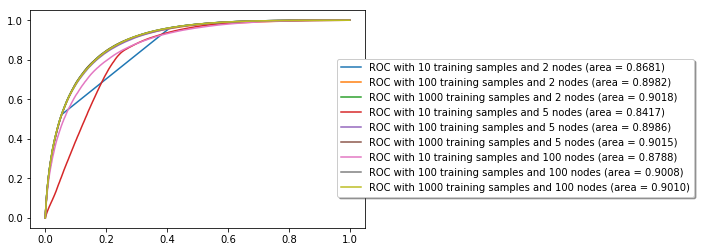

In [4]:
#Now try with ANNs
from sklearn.neural_network import MLPClassifier
nodes = [2, 5, 100]
D0test, D1test = GetRandomData(200000)
tstones = np.ones(max(D0test.shape)) 
tstzeros = np.zeros(max(D1test.shape)) 

for node in nodes:
    nSamp = [10, 100, 1000]
    for samp in nSamp:
        D0train, D1train = GetRandomData(samp)
        onearry = np.ones(max(D0train.shape))
        zeroarry = np.zeros(max(D1train.shape))
        clf = MLPClassifier( hidden_layer_sizes=(node), max_iter=10, alpha=1e-4, solver='lbfgs')
        clf.fit(np.concatenate((D1train, D0train)), np.concatenate((zeroarry, onearry)))
        outlabel = clf.predict(np.concatenate((D1test, D0test)))
        outprobs = clf.predict_proba(np.concatenate((D1test, D0test)))
        #print(outprobs)
        fpr, tpr, _ = roc_curve(np.concatenate((tstzeros, tstones)), outprobs[:,1])
        roc_auc= auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC with '+ str(samp) + ' training samples and ' + str(node) + ' nodes (area = %0.4f)' % roc_auc)

plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()